# Structure Learning with Bayesian

In [9]:
import bnlearn as bn
from utils import prepare_data

bn.__version__

'0.7.14'

In [3]:
data, _ = prepare_data()

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


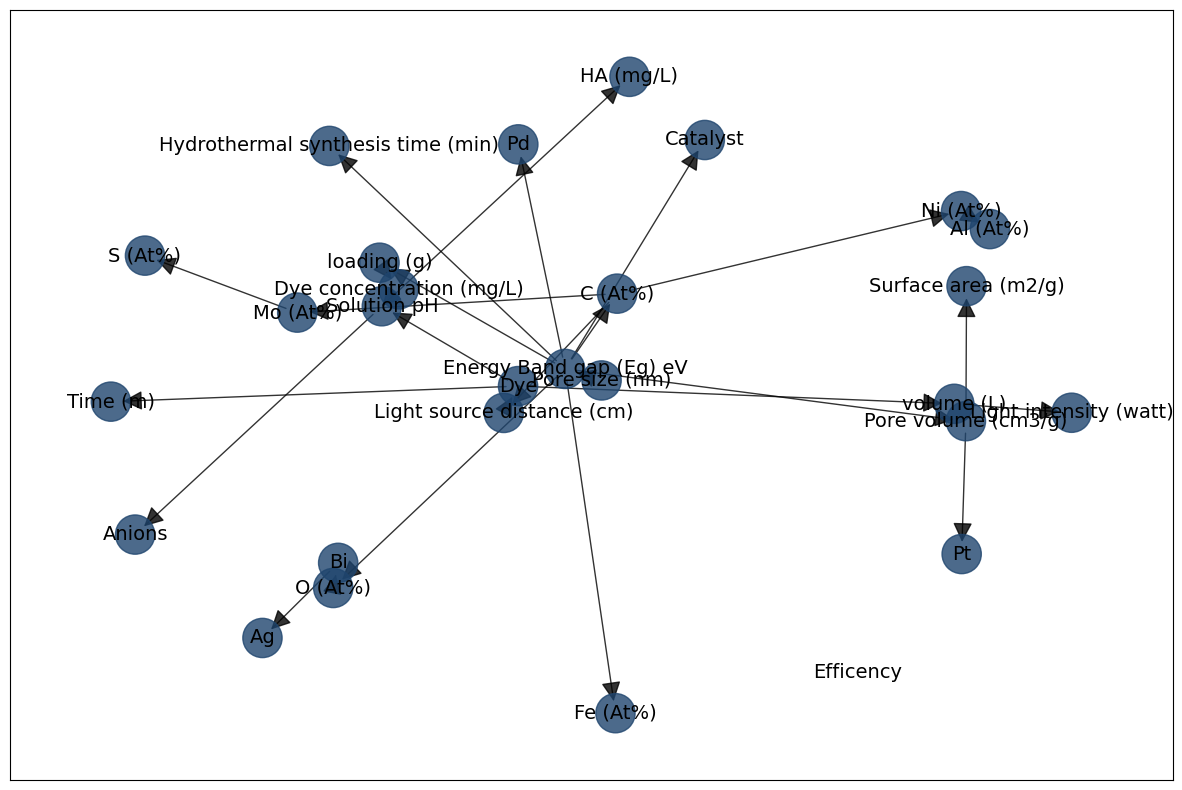

In [4]:
# Structure learning
# model = bn.structure_learning.fit(dfnum, methodtype='cl',
# black_list=['Embarked','Parch','Name'], root_node='Survived', bw_list_method='nodes')
model = bn.structure_learning.fit(data)

# Plot
G = bn.plot(model, interactive=False)

[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Existing coordinates from <pos> are used.


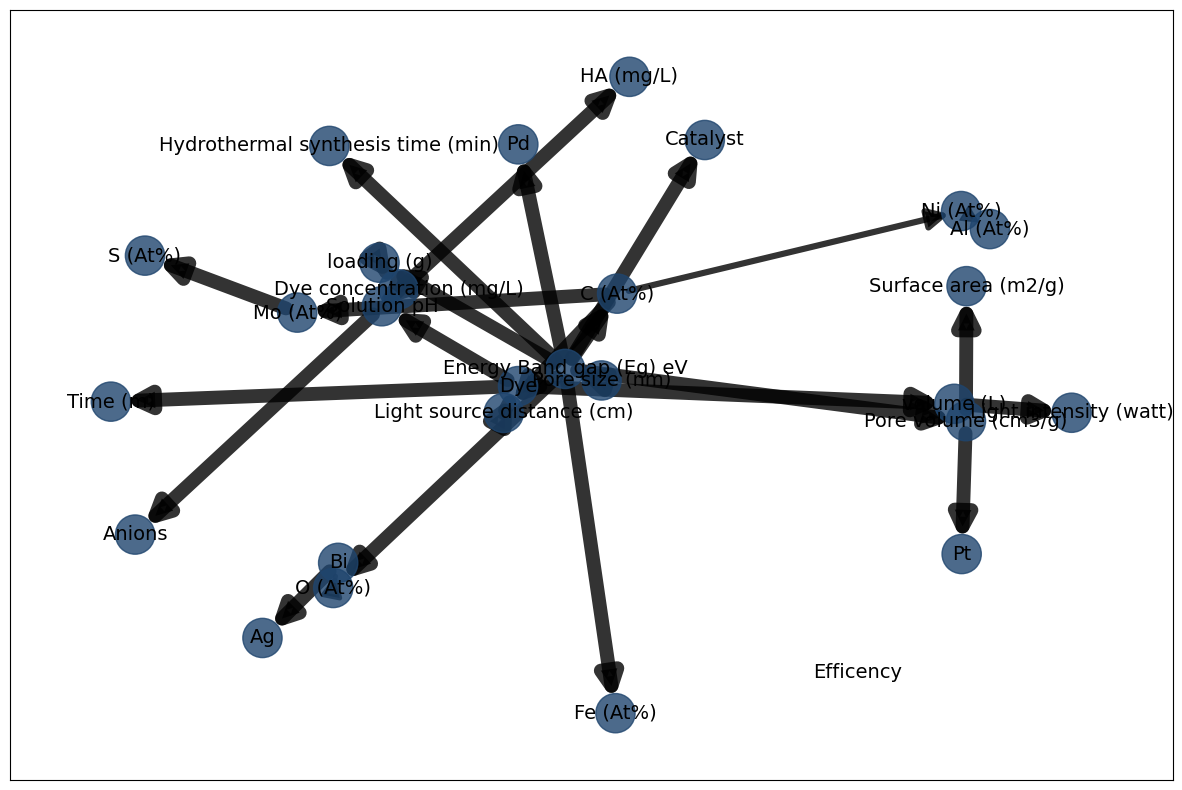

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Catalyst': array([0.26067523, 0.6708796 ]),
  'Hydrothermal synthesis time (min)': array([-0.49608415,  0.65368484]),
  'Energy Band gap (Eg) eV': array([-0.02086916,  0.00776467]),
  'C (At%)': array([0.0839335 , 0.22577559]),
  'O (At%)': array([-0.48826415, -0.62689721]),
  'Fe (At%)': array([ 0.08058521, -0.98956995]),
  'Al (At%)': array([0.83527877, 0.41279203]),
  'Ni (At%)': array([0.77720473, 0.46501049]),
  'Mo (At%)': array([-0.56080164,  0.17086283]),
  'S (At%)': array([-0.86767252,  0.33595873]),
  'Bi': array([-0.4783017 , -0.55408439]),
  'Ag': array([-0.63089877, -0.77167856]),
  'Pd': array([-0.11520041,  0.65818838]),
  'Pt': array([ 0.77838717, -0.52855114]),
  'Surface area (m2/g)': array([0.78821317, 0.24739769]),
  'Pore volume (cm3/g)': array([ 0.78693734, -0.14361836]),
  'Pore size (nm)': array([ 0.05258766, -0.02567338]),
  'volume (L)': array([ 0.76347701, -0.0

In [5]:
# Compute edge strength with the chi_square test statistic
model = bn.independence_test(model, data, test='chi_square', prune=True)
# Plot
bn.plot(model, interactive=False, pos=G['pos'])

In [6]:
# Parameter learning
model = bn.parameter_learning.fit(model, data)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Energy Band gap (Eg) eV:
+-------------------------------+-----+-----------------------+
| Pore size (nm)                | ... | Pore size (nm)(18.98) |
+-------------------------------+-----+-----------------------+
| Energy Band gap (Eg) eV(0.0)  | ... | 0.023937761819269904  |
+-------------------------------+-----+-----------------------+
| Energy Band gap (Eg) eV(2.1)  | ... | 0.023937761819269904  |
+-------------------------------+-----+-----------------------+
| Energy Band gap (Eg) eV(2.2)  | ... | 0.023937761819269904  |
+-------------------------------+-----+-----------------------+
| Energy Band gap (Eg) eV(2.22) | ... | 0.023937761819269904  |
+-------------------------------+-----+-----------------------+
| Energy Band gap (Eg) eV(2.28) | ... | 0.02393776181926990

In [7]:
# Make inference
query = bn.inference.fit(
    model,
    variables=['Catalyst'],
    evidence={'Time (m)':270,
              'Dye concentration (mg/L)':50})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+------------+-----------+
|    |   Catalyst |         p |
+====+============+===========+
|  0 |          0 | 0.0371567 |
+----+------------+-----------+
|  1 |          1 | 0.0388662 |
+----+------------+-----------+
|  2 |          2 | 0.0371567 |
+----+------------+-----------+
|  3 |          3 | 0.0371567 |
+----+------------+-----------+
|  4 |          4 | 0.0388662 |
+----+------------+-----------+
|  5 |          5 | 0.0388662 |
+----+------------+-----------+
|  6 |          6 | 0.0371567 |
+----+------------+-----------+
|  7 |          7 | 0.235847  |
+----+------------+-----------+
|  8 |          8 | 0.0371567 |
+----+------------+-----------+
|  9 |          9 | 0.0371567 |
+----+------------+-----------+
| 10 |         10 | 0.0388662 |
+----+------------+-----------+
| 11 |         11 | 0.0388662 |
+----+------------+-----------+
| 12 |         12 | 0.0729503 |
+----+------------+-----------

In [8]:
print(query)

+--------------+-----------------+
| Catalyst     |   phi(Catalyst) |
+==============+=================+
| Catalyst(0)  |          0.0372 |
+--------------+-----------------+
| Catalyst(1)  |          0.0389 |
+--------------+-----------------+
| Catalyst(2)  |          0.0372 |
+--------------+-----------------+
| Catalyst(3)  |          0.0372 |
+--------------+-----------------+
| Catalyst(4)  |          0.0389 |
+--------------+-----------------+
| Catalyst(5)  |          0.0389 |
+--------------+-----------------+
| Catalyst(6)  |          0.0372 |
+--------------+-----------------+
| Catalyst(7)  |          0.2358 |
+--------------+-----------------+
| Catalyst(8)  |          0.0372 |
+--------------+-----------------+
| Catalyst(9)  |          0.0372 |
+--------------+-----------------+
| Catalyst(10) |          0.0389 |
+--------------+-----------------+
| Catalyst(11) |          0.0389 |
+--------------+-----------------+
| Catalyst(12) |          0.0730 |
+--------------+----